# **Sales forecasting system**
### We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.

In [20]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from pickle import dump

### **Step 1:** Loading the dataset

In [2]:
# Loading the dataset from the URL https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv
sales_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

# Saving the dataframe as csv on the raw folder
sales_df.to_csv('../data/raw/sales.csv')

# Display the first few rows of the dataset
sales_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


### **Step 2:** Construct and analyze the timeserie

In [3]:
# Set the 'date' column as the index
sales_df['date'] = pd.to_datetime(sales_df['date'])
sales_df.set_index('date', inplace=True)
sales_df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


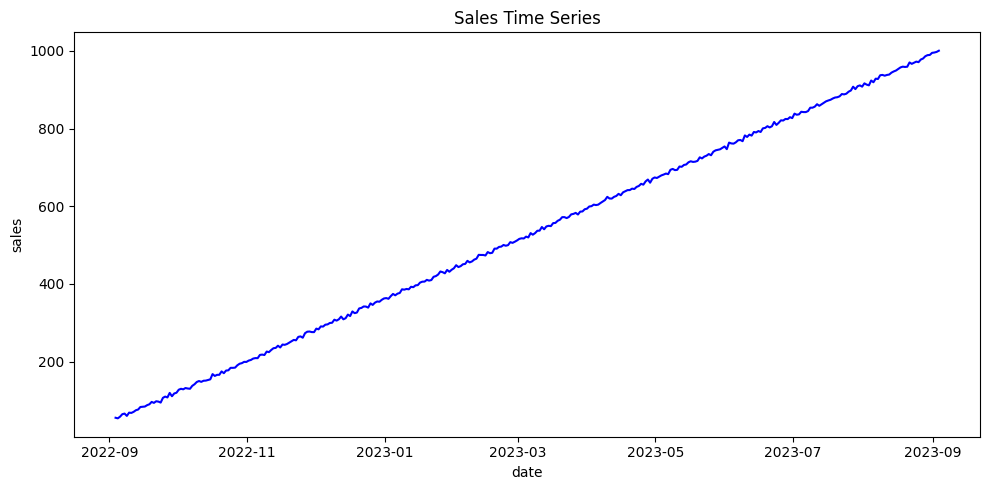

In [4]:
# Analysis of the time serie
# Plot the time series
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_df, x=sales_df.index, y='sales', color='blue')
plt.title('Sales Time Series')
plt.tight_layout()
plt.show()

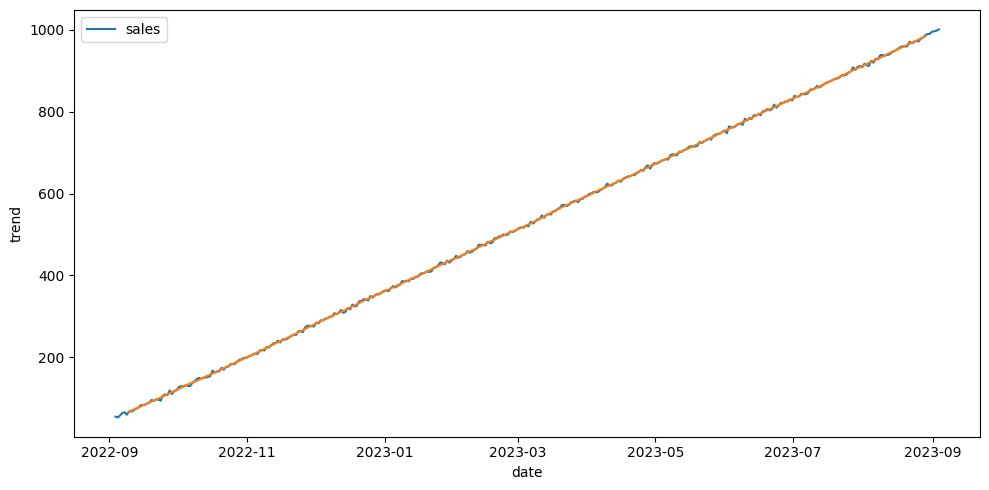

In [5]:
# Time series decomposition
decomposition = seasonal_decompose(sales_df['sales'], period=12)

# Trend analysis
trend = decomposition.trend

# Plot the trend
fig, ax = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

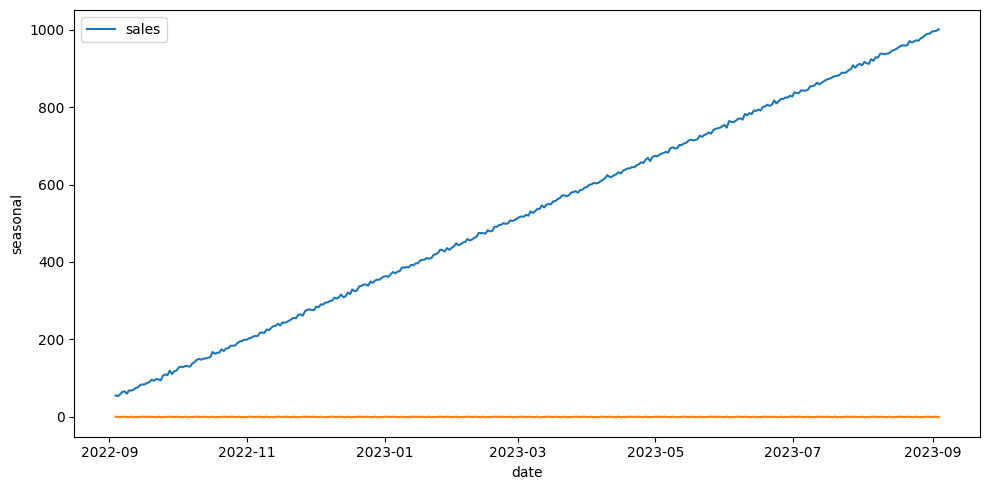

In [6]:
# Seasonal analysis
seasonal = decomposition.seasonal

# Plot the seasons
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = seasonal)
plt.tight_layout()
plt.show()

In [7]:
# Evaluate the stationarity of the time series applying the Dickey-Fuller test

# Define the test function
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

# Testing the time serie 
test_stationarity(sales_df)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

The p-values is greater than 0.05 what means that the time serie is not stationary

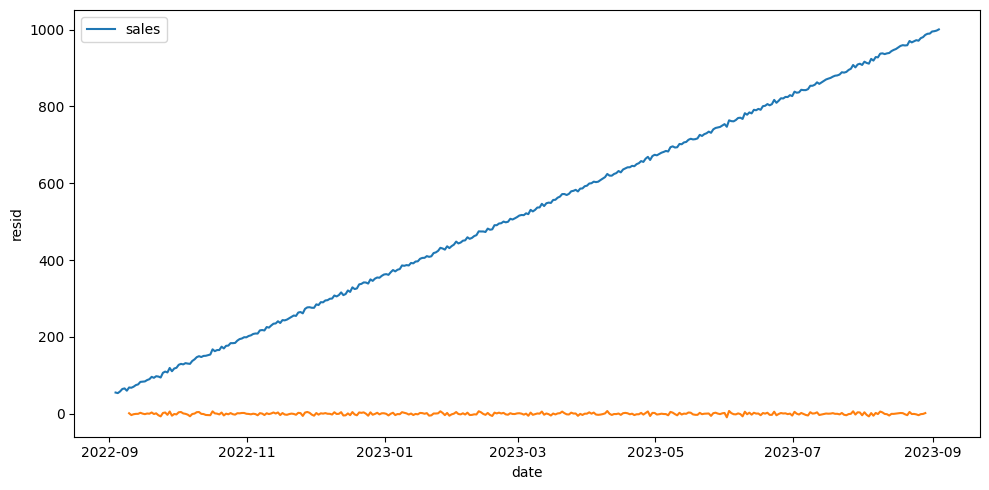

In [8]:
# Analysis of variability
residual = decomposition.resid

# Plot the variability
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_df)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

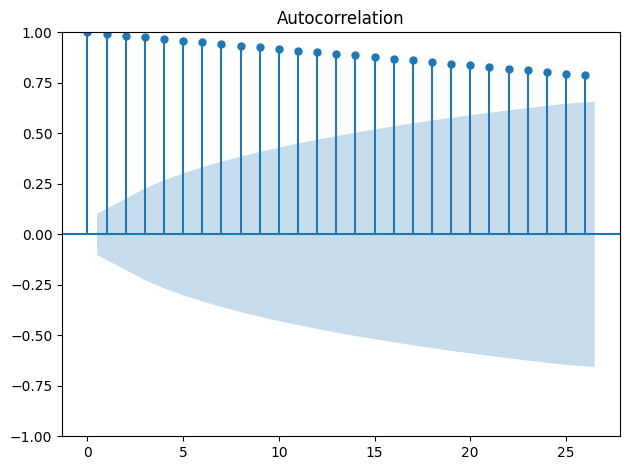

In [9]:
# Autocorrelation analysis
plot_acf(sales_df)
plt.tight_layout()
plt.show()

### **Step 3:** Train an ARIMA

In [10]:
# Transform the time serie into stationary
sales_stat = sales_df.diff().dropna()
test_stationarity(sales_stat)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [11]:
# Apply the method ARIMA to the model
model = auto_arima(sales_stat, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=1843.155, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2209.657, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=1840.533, Time=2.81 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=1840.763, Time=3.12 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=1842.448, Time=3.19 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=inf, Time=2.79 sec
 ARIMA(1,0,2)(2,0,1)[7] intercept   : AIC=inf, Time=2.40 sec
 ARIMA(2,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(3,0,2)(2,0,1)[7] intercept   : AIC=1842.555, Time=3.22 sec
 ARIMA(2,0,3)(2,0,1)[7] intercept   : AIC=1838.849, Time=2.81 s

The best model is the one with the following parameters ARIMA(1,0,1)

In [15]:
# statistical and performance information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 7)   Log Likelihood                -912.752
Date:                            Sun, 22 Oct 2023   AIC                           1835.504
Time:                                    15:51:44   BIC                           1855.004
Sample:                                09-04-2022   HQIC                          1843.254
                                     - 09-03-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3859      0.202     11.819      0.000       1.990       2.782
ar.L1         -0.0645      0.052     -1.251      0.211      -0.166       0.037
ma.L1         -0.9638      0.017    -56.361      0.000      -0.997      -0.930
ar.S.L7        0.1376      0.053      2.575      0.010       0.033       0.242
sigma2         8.6283      0.670     12.877      0.000       7.315       9.942
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.98   Prob(JB):                         0.78
Heteroskedasticity (H):               0.86   Skew:                             0.06
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Step 4:** Predict with the test set

In [18]:
# Make predictions
forecast = model.predict(30)
forecast

2023-09-04 17:10:08.079328    1.958974
2023-09-05 17:10:08.079328    2.702206
2023-09-06 17:10:08.079328    2.308054
2023-09-07 17:10:08.079328    2.982694
2023-09-08 17:10:08.079328    2.355025
2023-09-09 17:10:08.079328    2.452551
2023-09-10 17:10:08.079328    2.672236
2023-09-11 17:10:08.079328    2.510771
2023-09-12 17:10:08.079328    2.613026
2023-09-13 17:10:08.079328    2.558797
2023-09-14 17:10:08.079328    2.651615
2023-09-15 17:10:08.079328    2.565260
2023-09-16 17:10:08.079328    2.578677
2023-09-17 17:10:08.079328    2.608902
2023-09-18 17:10:08.079328    2.586687
2023-09-19 17:10:08.079328    2.600756
2023-09-20 17:10:08.079328    2.593295
2023-09-21 17:10:08.079328    2.606065
2023-09-22 17:10:08.079328    2.594184
2023-09-23 17:10:08.079328    2.596030
2023-09-24 17:10:08.079328    2.600189
2023-09-25 17:10:08.079328    2.597132
2023-09-26 17:10:08.079328    2.599068
2023-09-27 17:10:08.079328    2.598041
2023-09-28 17:10:08.079328    2.599798
2023-09-29 17:10:08.07932

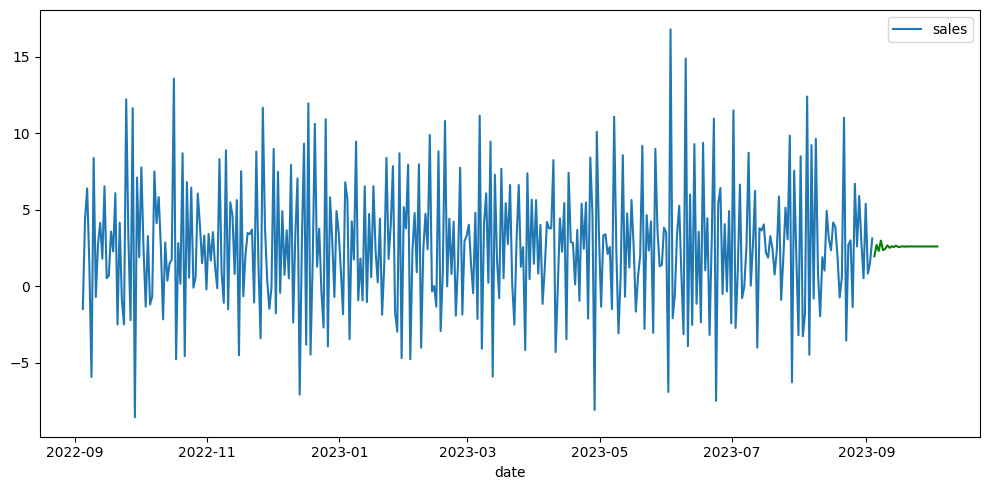

In [19]:
# Ploting the predictions
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = sales_stat, c = "blue")
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()

plt.show()

### **Step 5:** Save the model

In [21]:
# Saving the model
dump(model, open("../models/ARIMA_daily.sav", "wb"))